# Video: Visualizing Additive Smoothing

Additive smoothing is a common technique to avoid zero probability estimates for rare words.
This video explains the motivation and illustrates the technique.

Script:
* Additive smoothing is a technique to handle low data situations where conditional probabilities are estimated to be zero.
* For text-based problems, these are difficult to fix with more data, since even more rare words will pop up and just move the problem around.

## Sunrise Problem

> What is the probability that the sun will rise tomorrow?

--Richard Price, 1763

Script:
* The essence of the problem is the following question.
* How do we estimate the probability of something that we have never seen before?
* Richard Price asked this question about the probability that the sun will not rising on any given day.
* So far, the sun has risen every day that humans have been around to watch it.
* But at some point trillions of years in the distant future, the sun will have faded and no longer shine.
* So the probability that the sun will rise tomorrow will not be 100% in the future.
* How can we estimate the probability that the sun will not rise without knowing astrophysics?

## Rare Features vs Naive Bayes

What if a rare feature occurs exactly once?
* $P[f|C_k] > 0$ (observed class)
* $P[f|C_{j \neq k}] = 0$ (all other classes)

Script:
* The same issue comes up when we have rarely occuring features.
* If the feature only occurs once, then it can only occur with one class.
* For the rest of the classes, the data says that the feature never occurs.
* So they will model that feature has having conditional probability zero.
* How bad is that?
* If that feature comes up again, then all but one class will be instantly eliminated because their probabilities become zero.
* Does that make sense?
* What if two such rare features occur at the same time with conflicting classes?


## Laplacian Smoothing

If there are $m$ possible outcomes,

$P[x_i|C_k] \approx \frac{n_{i,k} + 1}{n_k + m}$

Script:
* The mathematician Pierre-Simon Laplace's solution to sunset problem was to add pseudocounts to the calculation.
* You can think of the pseudocounts as adding one fake occurence of each feature for each class.
* So if there are two possible outcomes, then the estimates start at one half before collecting data and the estimate slowly approaches the empirical estimate.

## Laplacian Smoothing for the Sunset Problem


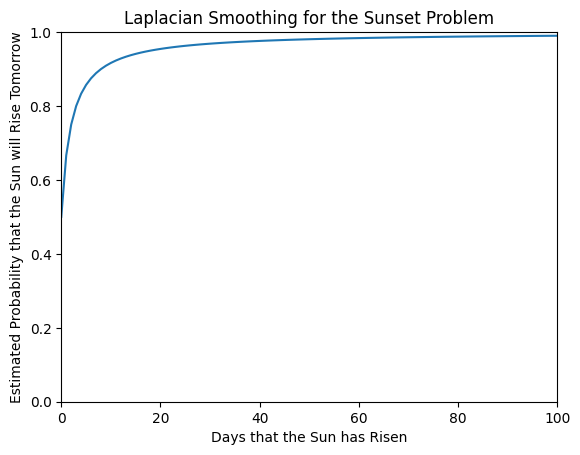

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ts = np.arange(0, 101)
plt.plot(ts, (ts + 1) / (ts + 2))
plt.xlabel("Days that the Sun has Risen")
plt.xlim(0, 100)
plt.ylabel("Estimated Probability that the Sun will Rise Tomorrow")
plt.ylim(0, 1)
plt.title("Laplacian Smoothing for the Sunset Problem")
plt.show()

Script:
* This chart shows Laplacian smoothing for the sunset problem.
* As more days go by, the estimated probability gets closer and closer to one without reaching it.

## Additive Smoothing

Additive smoothing generalizes Laplacian smoothing with a new parameter $\alpha$.

If there are $m$ possible outcomes,

$P[x_i|C_k] \approx \frac{n_{i,k} + \alpha}{n_k + \alpha m}$

Script:
* A generalization of Laplacian smoothing is additive smoothing.
* Additive smoothing adds a new parameter $\alpha$ and makes that the initial pseudocount for each possible outcome.
* So, $\alpha=0$ just uses the raw data and $\alpha=1$ is the same as Laplacian smoothing.
* Any non-negative value of $\alpha$ can be used.

## Additive Smoothing with Two Choices


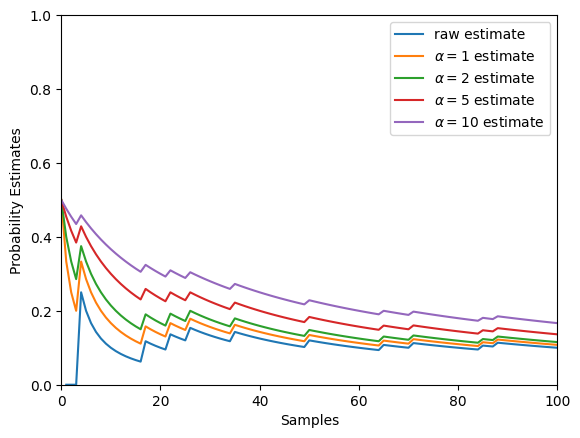

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(704)

p = 0.1

ts = np.arange(0, 101)
raw = np.random.uniform(size=101) < p
raw[0] = 0
cumsum = np.cumsum(raw)

plt.plot(ts[1:], cumsum[1:] / ts[1:], label="raw estimate")
plt.plot(ts, (cumsum + 1) / (ts + 2), label=r"$\alpha=1$ estimate")
plt.plot(ts, (cumsum + 2) / (ts + 4), label=r"$\alpha=2$ estimate")
plt.plot(ts, (cumsum + 5) / (ts + 10), label=r"$\alpha=5$ estimate")
plt.plot(ts, (cumsum + 10) / (ts + 20), label=r"$\alpha=10$ estimate")

plt.legend()
plt.xlabel("Samples")
plt.xlim(0, 100)
plt.ylabel("Probability Estimates")
plt.ylim(0, 1)

plt.show();

Script:
* This chart compares the raw estimates with additive smoothing using $\alpha$ values of 1, 2, 5 and 10.
* All these curves move similarly, and they all get closer to each other with more sample data.
* The raw estimate varies the most, while the smoothed estimates all start from 1/2 and converge at different speeds.

## Additive Smoothing vs Beta Distributions

A beta distribution with parameters $\alpha$ and $\beta$ has posterior mean $\frac{\alpha}{\alpha + \beta}$.

Start with $\alpha=\beta$ to get the same estimates as additive smoothing with $\alpha$.

Script:
* You may have recognized that the previous chart was very similar to estimates from beta distributions.
* If we start with the same $\alpha$ value for additive smoothing and the beta distribution, and set $\beta = \alpha$ for the beta distribution, then both techniques will give the same estimates from the same data.
* However, the beta distribution only works for two possible outputs.

Script: (faculty on screen)
* Additive smoothing is a common technique to handle low data edge cases.
* Many modeling techniques use variations of it to handle missing data cases.
* You should keep it in mind to deal with their inevitable occurences.